# Task-19 100DaysOfBytewiseML/DL - Fewllowship


###  Comparative Analysis of Clustering Techniques Across Datasets

## Task Description:

## Dataset Selection and Initial Analysis:
## Step 1:
#### Choose two datasets from the list provided (Iris, Mall Customers, Wholesale Customers).
## Step 2: 
#### Conduct an initial exploratory data analysis (EDA) for each dataset to understand its characteristics, including data distribution, feature correlations, and potential outliers.


In [8]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load Iris dataset using sklearn's load_iris
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['Species'] = iris.target

# Load Wholesale Customers dataset using pandas
wholesale_data = pd.read_csv('Whole_sale_customers_data.csv')

# Display the first few rows of each dataset to verify loading
print("Iris Dataset:")
print(iris_data.head())

print("\nWholesale Customers Dataset:")
print(wholesale_data.head())



Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  

Wholesale Customers Dataset:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4       

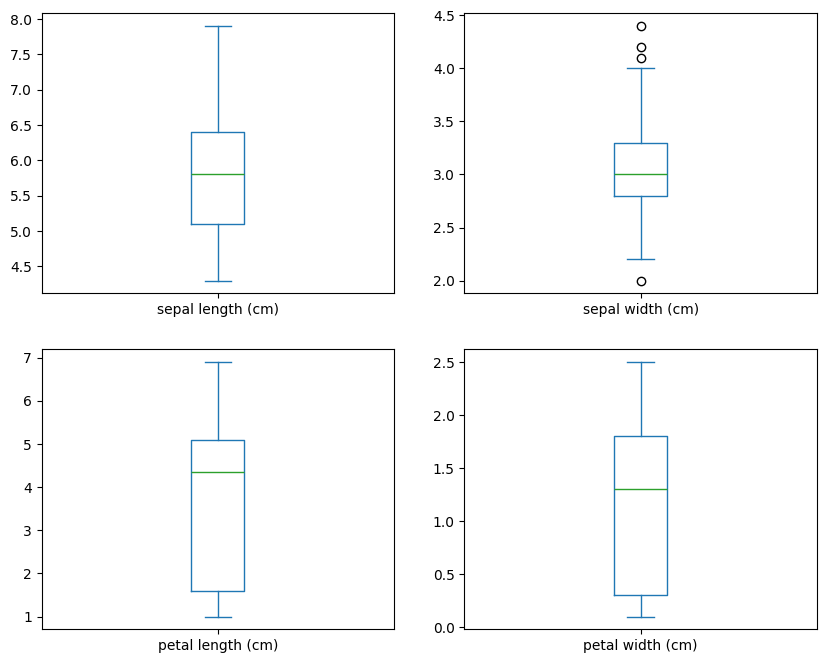

In [9]:
# Boxplot for each feature
iris_data.drop(columns='Species').plot(kind='box', subplots=True, layout=(2,2), figsize=(10,8), sharex=False, sharey=False)
plt.show()


In [5]:
# Shape of the dataset
print(f"Wholesale Customers Dataset Shape: {wholesale_data.shape}")

# Summary statistics
print(wholesale_data.describe())

# Check for missing values
print(wholesale_data.isnull().sum())


Wholesale Customers Dataset Shape: (440, 8)
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
2

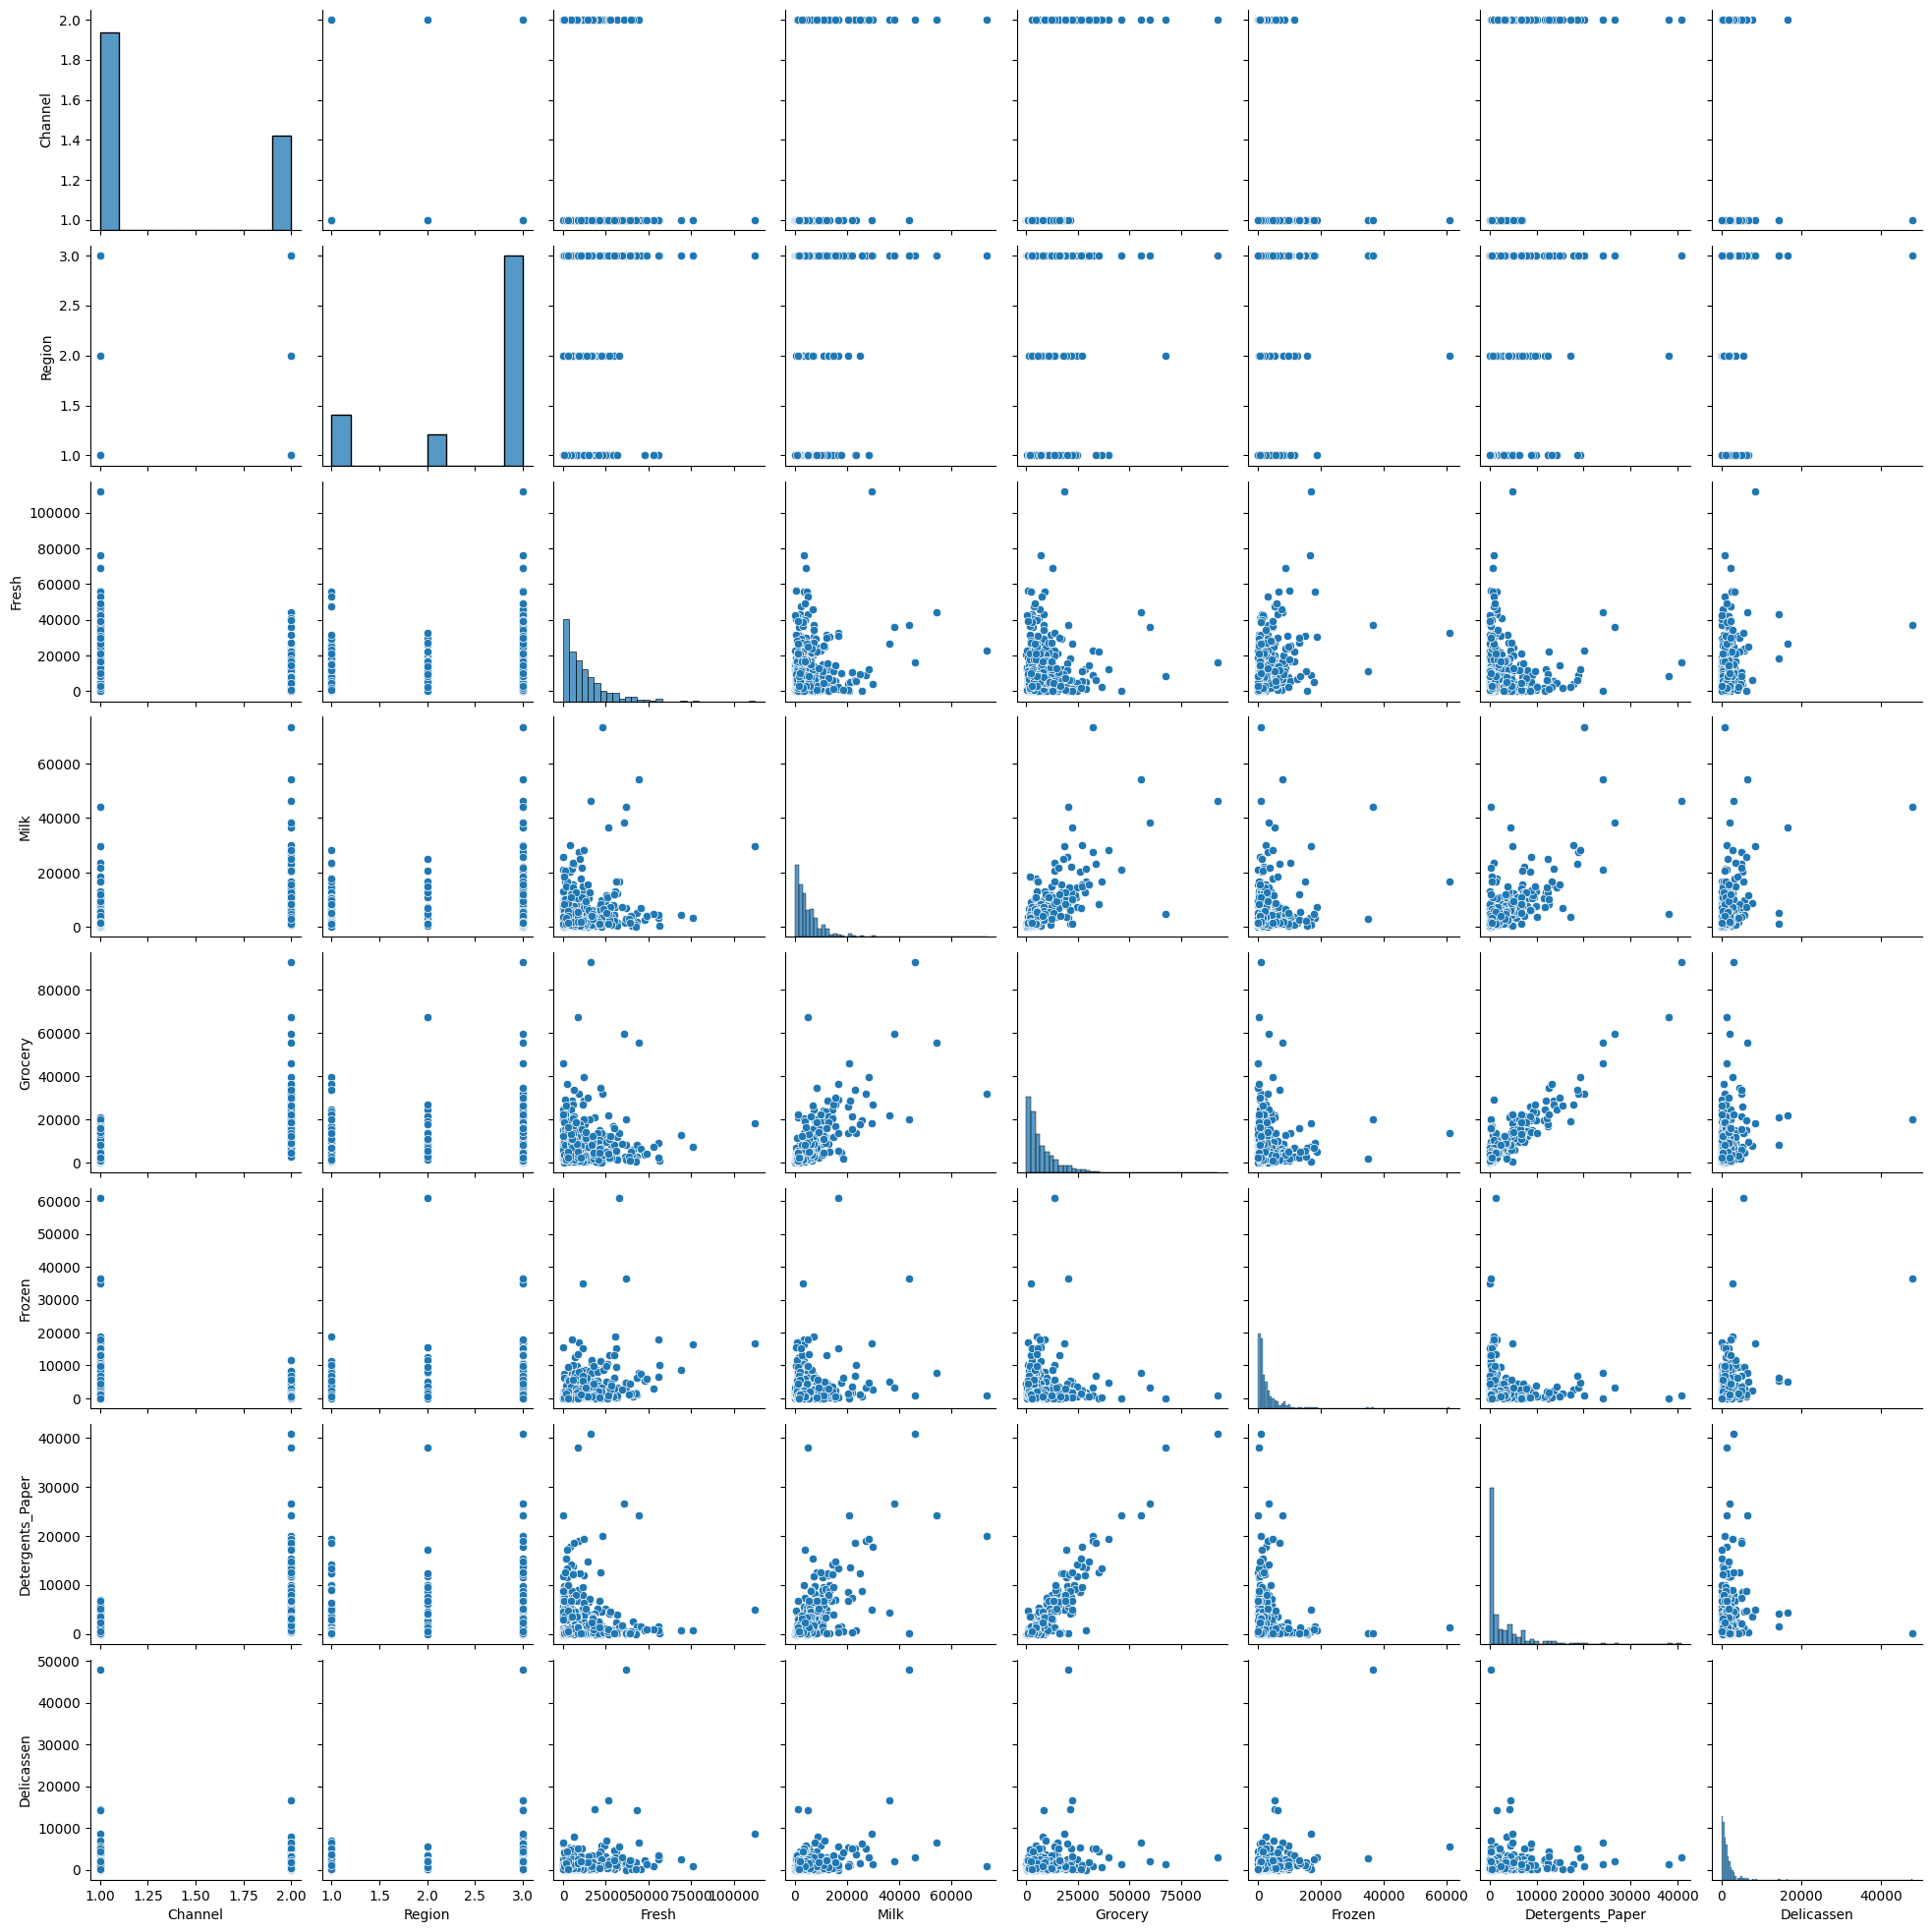

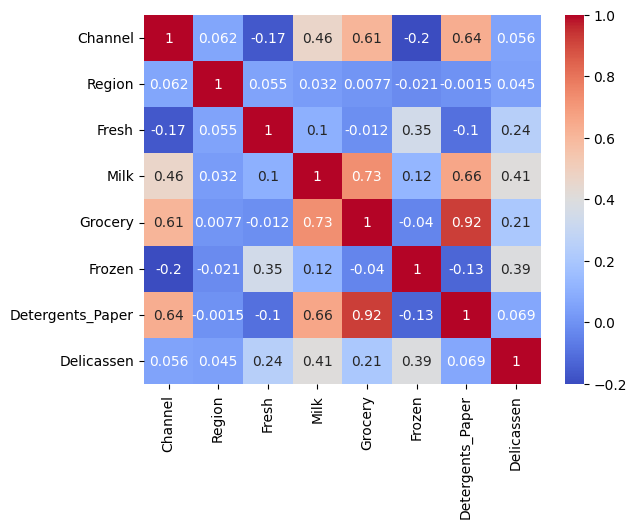

In [10]:
# Pairplot or scatter matrix
import seaborn as sns
sns.pairplot(wholesale_data)
plt.show()

# Correlation matrix
sns.heatmap(wholesale_data.corr(), annot=True, cmap='coolwarm')
plt.show()


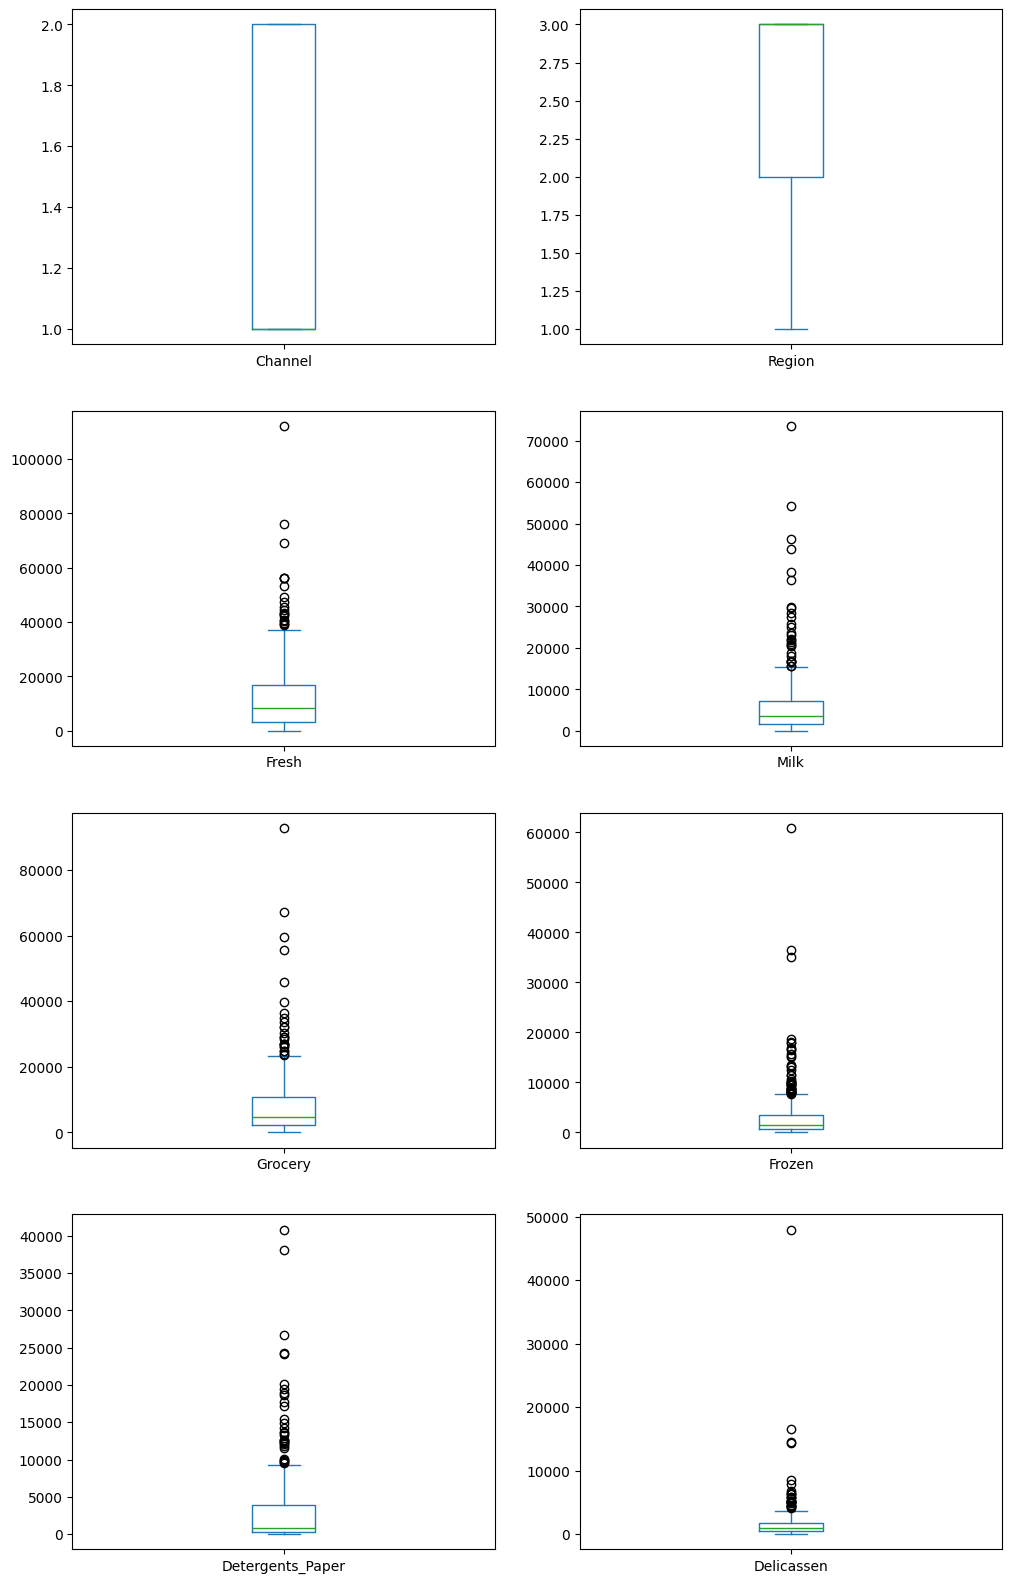

In [14]:
# Boxplot for each feature
wholesale_data.plot(kind='box', subplots=True, layout=(4,2), figsize=(12,20), sharex=False, sharey=False)
plt.show()


### 2. Implementing Clustering Algorithms:
## Step 3:
####  Apply K-Means clustering to both datasets. Determine the optimal number of clusters using methods such as the Elbow Method and Silhouette Score.
## Step 4:
#### Apply Hierarchical Clustering to both datasets, choosing an appropriate linkage criterion (e.g., single, complete, average) and visualizing the dendrogram to determine the number of clusters.


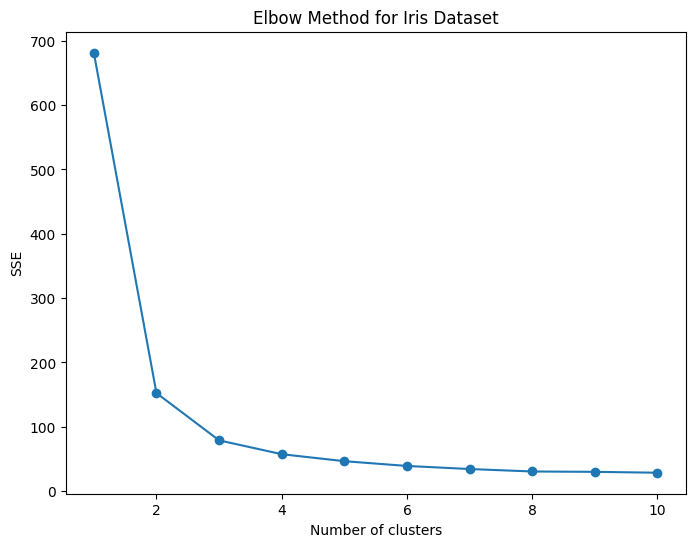

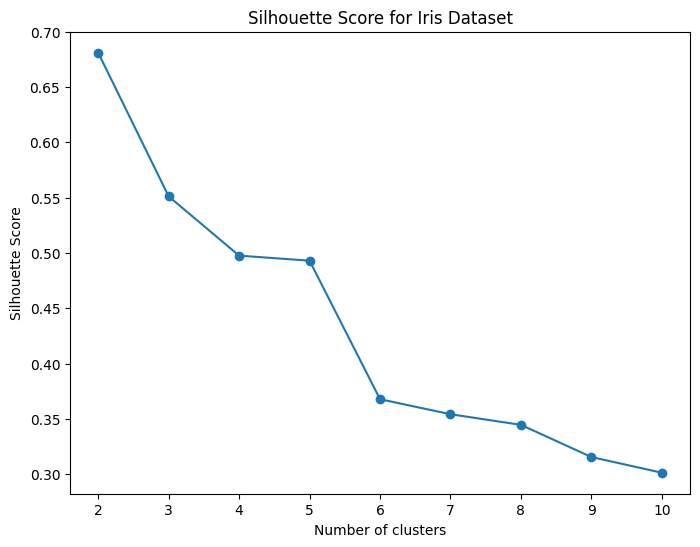

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Iris Dataset')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Determine the optimal number of clusters using Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(iris_data)
    silhouette_scores.append(silhouette_score(iris_data, labels))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Iris Dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


# K-Means on Wholesale Customers Dataset

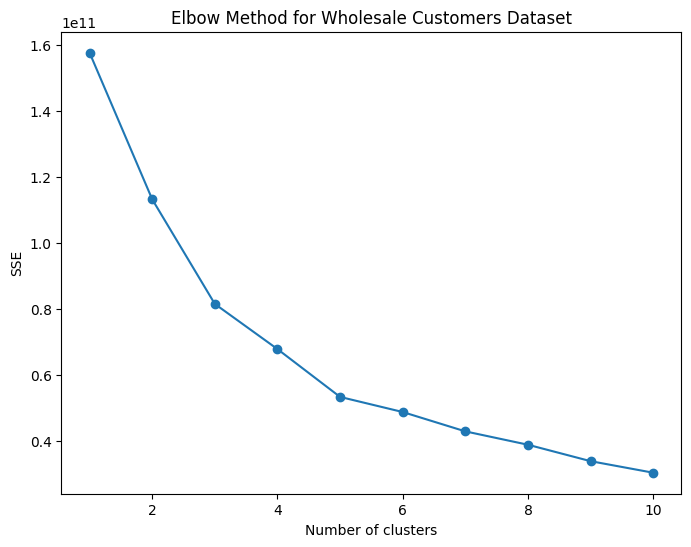

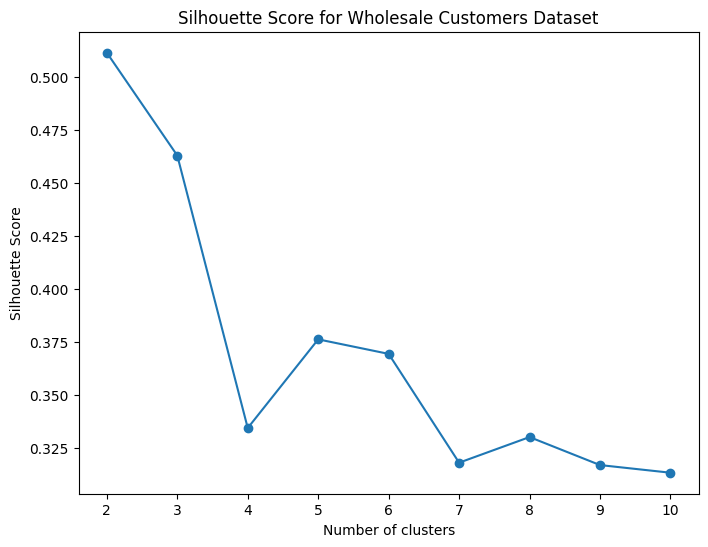

In [16]:
# Load the Wholesale Customers dataset
wholesale_data = pd.read_csv('Whole_sale_customers_data.csv')

# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(wholesale_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Wholesale Customers Dataset')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Determine the optimal number of clusters using Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(wholesale_data)
    silhouette_scores.append(silhouette_score(wholesale_data, labels))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Wholesale Customers Dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


# Step 4: Apply Hierarchical Clustering
# Hierarchical Clustering on Iris Dataset

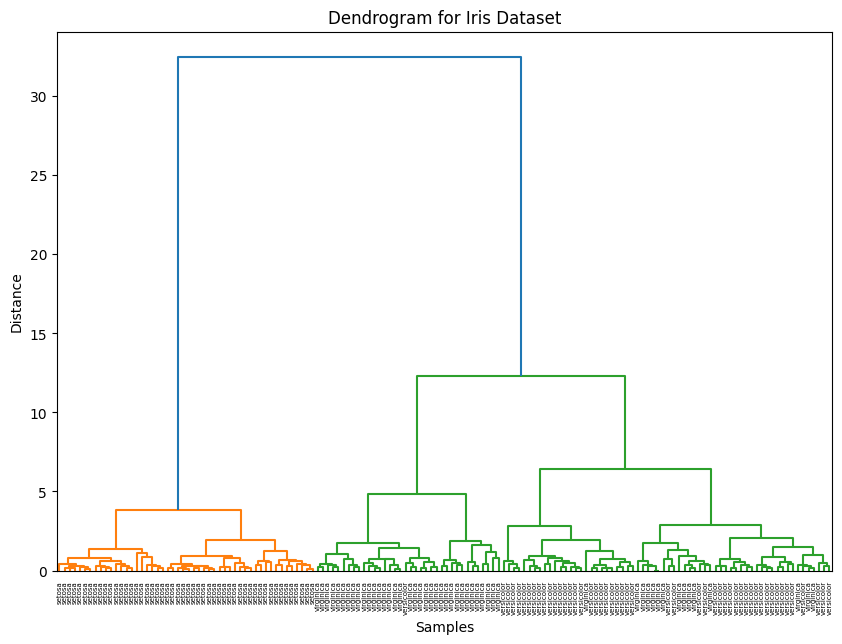

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# Perform hierarchical/agglomerative clustering
linked = linkage(iris_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=iris.target_names[iris.target])
plt.title('Dendrogram for Iris Dataset')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Determine clusters based on the dendrogram
hierarchical_clusters = fcluster(linked, t=3, criterion='maxclust')


# Hierarchical Clustering on Wholesale Customers Dataset

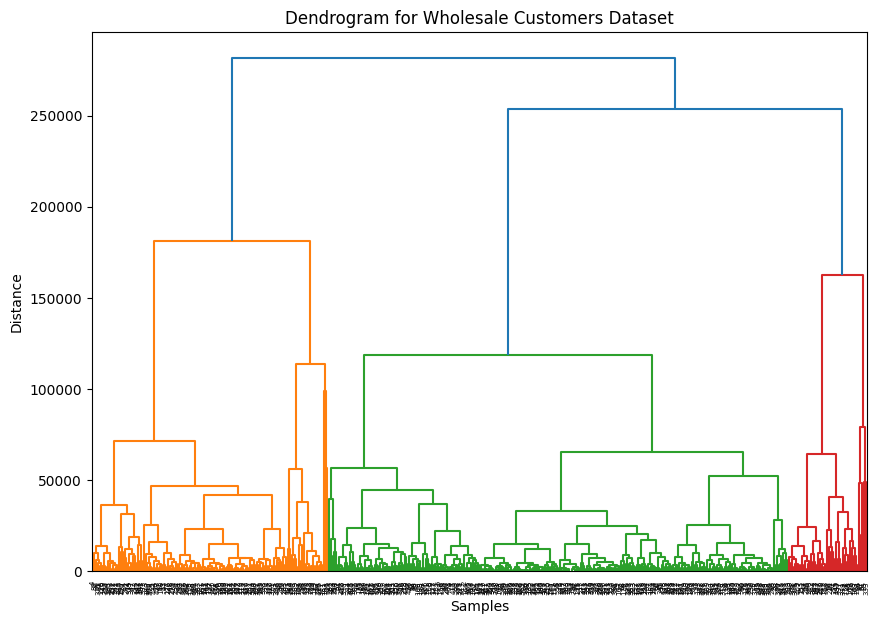

In [18]:
# Perform hierarchical/agglomerative clustering
linked = linkage(wholesale_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top')
plt.title('Dendrogram for Wholesale Customers Dataset')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Determine clusters based on the dendrogram
hierarchical_clusters = fcluster(linked, t=3, criterion='maxclust')


### 3. Cluster Visualization and Interpretation:
## Step 5: 
#### Visualize the clusters obtained from both K-Means and Hierarchical Clustering. Use dimensionality reduction techniques like PCA or t-SNE to help in visualizing the clusters, if necessary.
## Step 6: 
#### Compare the clustering results qualitatively (e.g., cluster compactness, separation) and quantitatively (e.g., Silhouette Score, Davies-Bouldin Index).


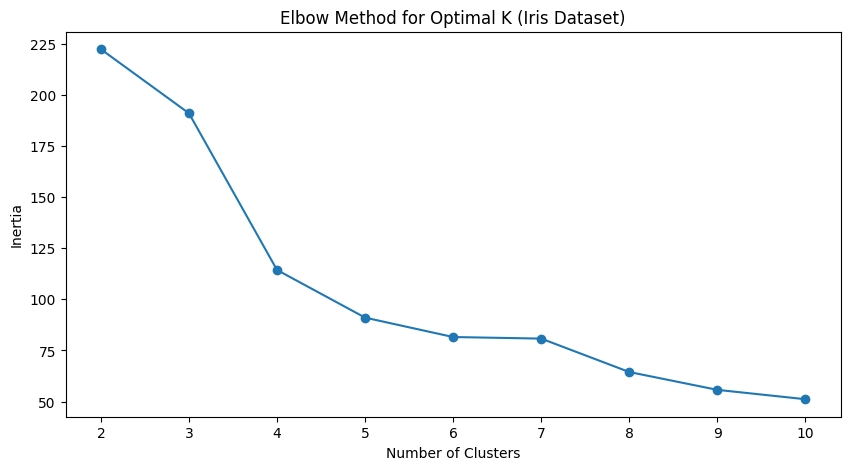

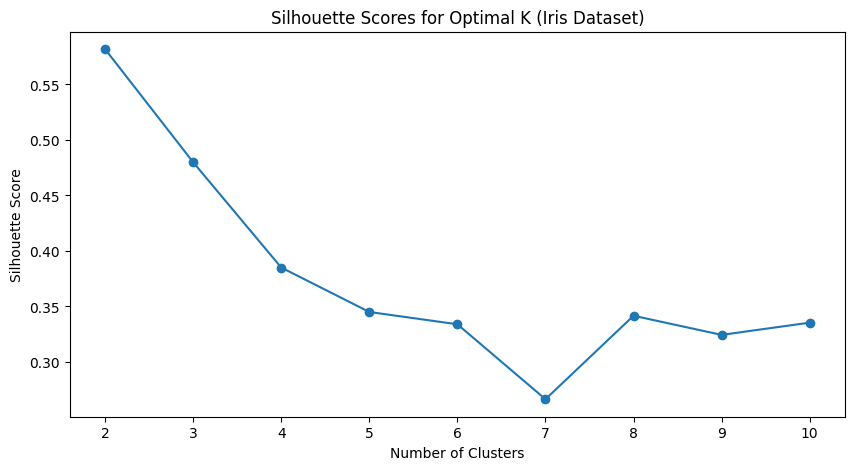

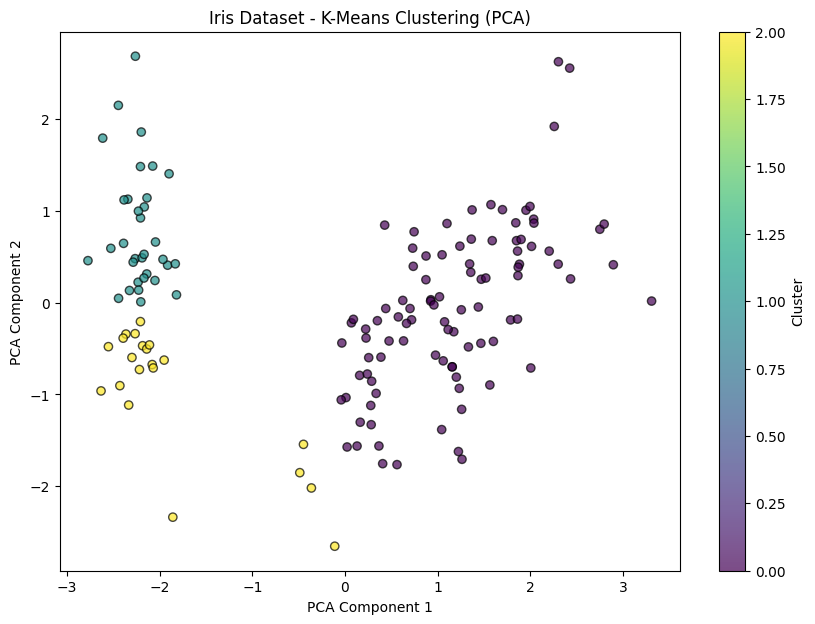

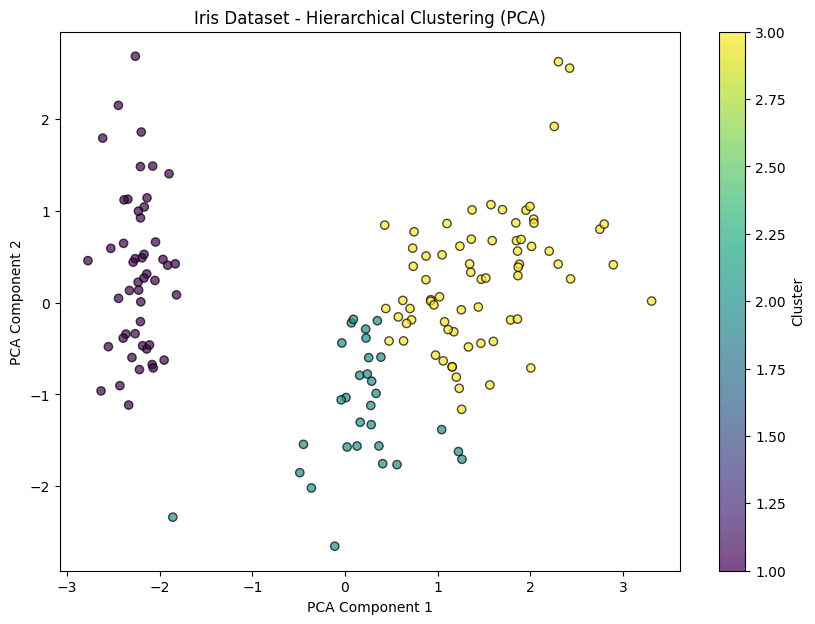

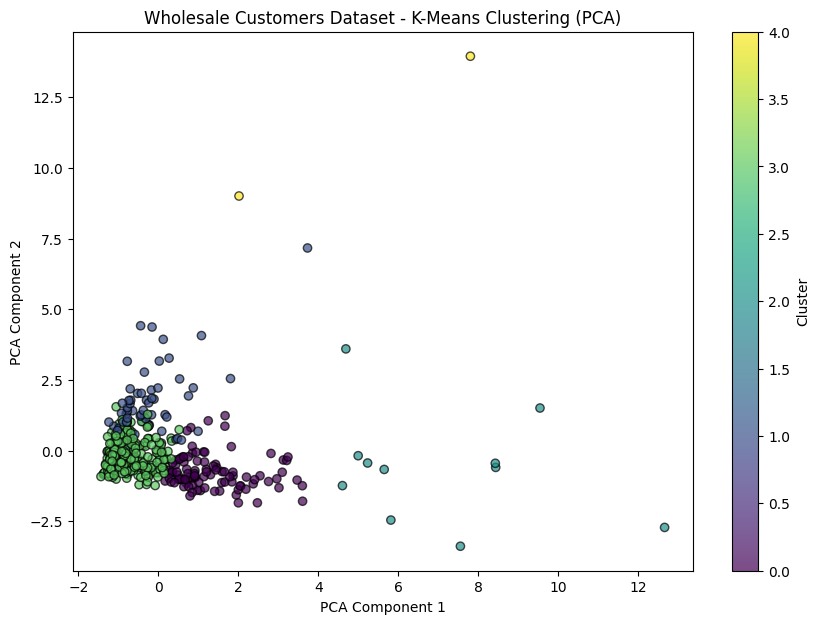

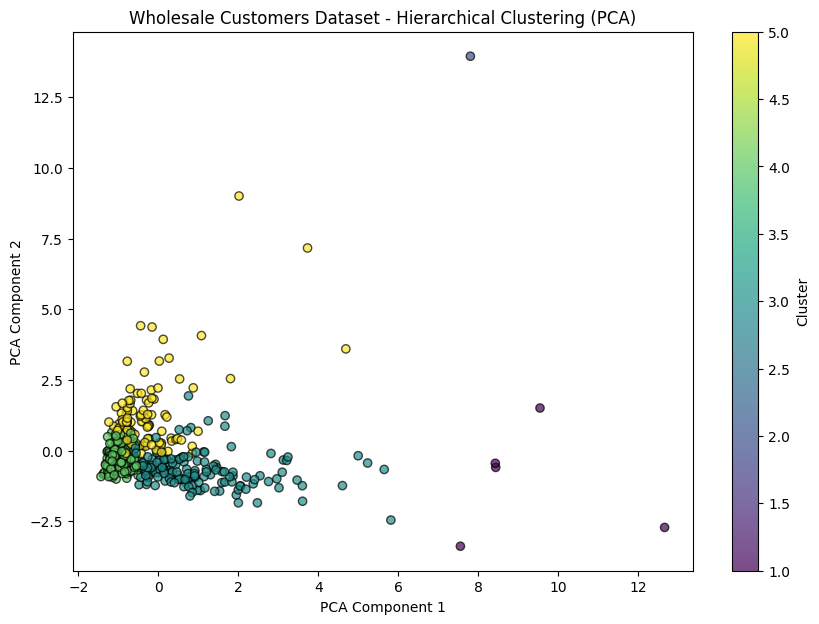

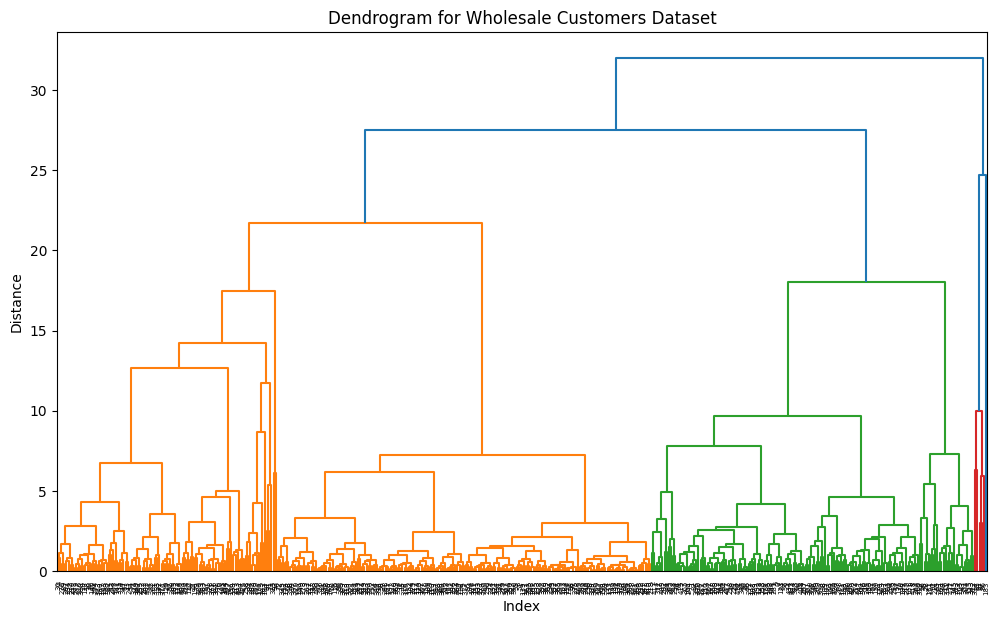

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load the Iris dataset
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_labels = iris.target

# Load the Wholesale Customers dataset
wholesale_data = pd.read_csv('Whole_sale_customers_data.csv')
wholesale_data = wholesale_data.drop(columns=['Channel', 'Region'])  # Drop non-numeric columns
wholesale_data = wholesale_data.fillna(0)  # Handle missing values

# Standardize data
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_data)
wholesale_scaled = scaler.fit_transform(wholesale_data)

# K-Means Clustering Function
def kmeans_clustering(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    return labels

# Hierarchical Clustering Function
def hierarchical_clustering(X, n_clusters):
    linked = linkage(X, method='ward')
    labels = fcluster(linked, n_clusters, criterion='maxclust')
    return labels

# Determine optimal number of clusters for K-Means
def find_optimal_k(X, max_k):
    inertia = []
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        inertia.append(kmeans.inertia_)
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)
    return inertia, silhouette_scores

# Plot clusters
def plot_clusters(X, labels, title):
    # Dimensionality reduction for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', alpha=0.7)
    plt.colorbar(scatter, label='Cluster')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Elbow Method and Silhouette Score for Iris Dataset
inertia_iris, silhouette_scores_iris = find_optimal_k(iris_scaled, 10)

# Elbow Plot for Iris Dataset
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia_iris, marker='o')
plt.title('Elbow Method for Optimal K (Iris Dataset)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Silhouette Scores for Iris Dataset
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores_iris, marker='o')
plt.title('Silhouette Scores for Optimal K (Iris Dataset)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Apply K-Means and Hierarchical Clustering for Iris Dataset
kmeans_labels_iris = kmeans_clustering(iris_scaled, 3)
hierarchical_labels_iris = hierarchical_clustering(iris_scaled, 3)

# Plot clusters for Iris Dataset
plot_clusters(iris_scaled, kmeans_labels_iris, 'Iris Dataset - K-Means Clustering (PCA)')
plot_clusters(iris_scaled, hierarchical_labels_iris, 'Iris Dataset - Hierarchical Clustering (PCA)')

# Apply K-Means and Hierarchical Clustering for Wholesale Dataset
kmeans_labels_wholesale = kmeans_clustering(wholesale_scaled, 5)
hierarchical_labels_wholesale = hierarchical_clustering(wholesale_scaled, 5)

# Plot clusters for Wholesale Dataset
plot_clusters(wholesale_scaled, kmeans_labels_wholesale, 'Wholesale Customers Dataset - K-Means Clustering (PCA)')
plot_clusters(wholesale_scaled, hierarchical_labels_wholesale, 'Wholesale Customers Dataset - Hierarchical Clustering (PCA)')

# Hierarchical Clustering Dendrogram for Wholesale Dataset
plt.figure(figsize=(12, 7))
linked = linkage(wholesale_scaled, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Wholesale Customers Dataset')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()


### 4. Exploratory Analysis and Insights:
## Step 7: 
#### Analyze the clusters in the context of the original features. For each dataset, interpret the clusters to identify any patterns or insights (e.g., customer segments, species differentiation).

## Step 8: 
#### Explore the impact of different clustering parameters (e.g., number of clusters in K-Means, linkage criteria in Hierarchical Clustering) on the results.


Iris Dataset - K-Means Clustering Summary:
                sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster_KMeans                                                           
0                        6.314583          2.895833           4.973958   
1                        5.169697          3.630303           1.493939   
2                        4.747619          2.895238           1.757143   

                petal width (cm)  Cluster_Hierarchical  
Cluster_KMeans                                          
0                       1.703125              2.739583  
1                       0.272727              1.000000  
2                       0.352381              1.238095  

Iris Dataset - Hierarchical Clustering Summary:
                      sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster_Hierarchical                                                           
1                              5.016327          3.451020           1.465306   
2           

<Figure size 1200x600 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

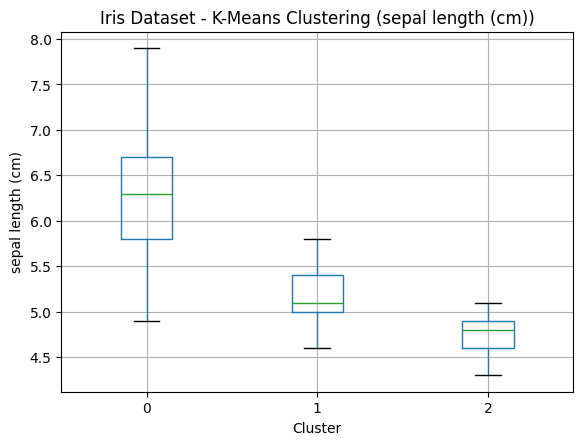

<Figure size 1000x700 with 0 Axes>

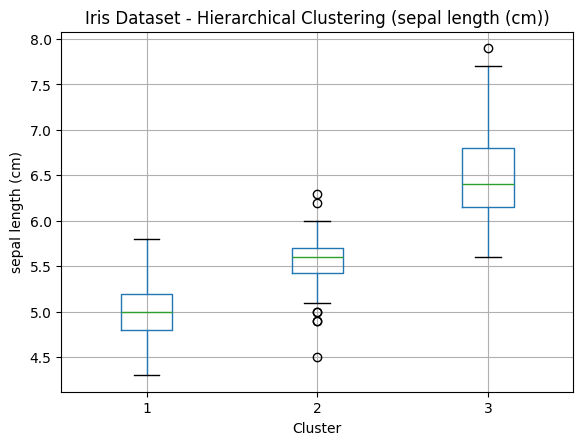

<Figure size 1000x700 with 0 Axes>

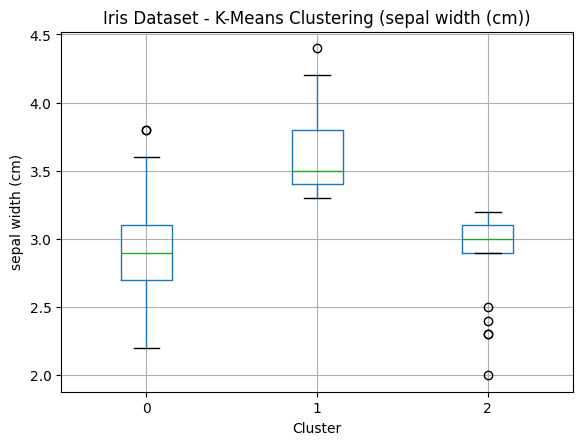

<Figure size 1000x700 with 0 Axes>

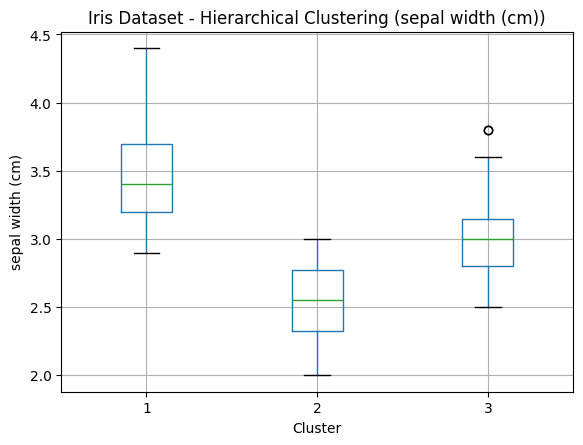

<Figure size 1000x700 with 0 Axes>

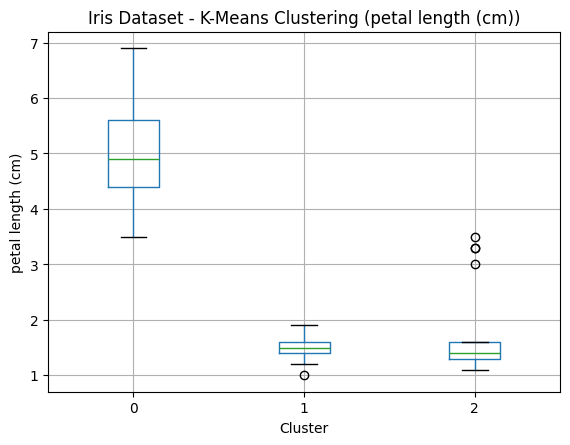

<Figure size 1000x700 with 0 Axes>

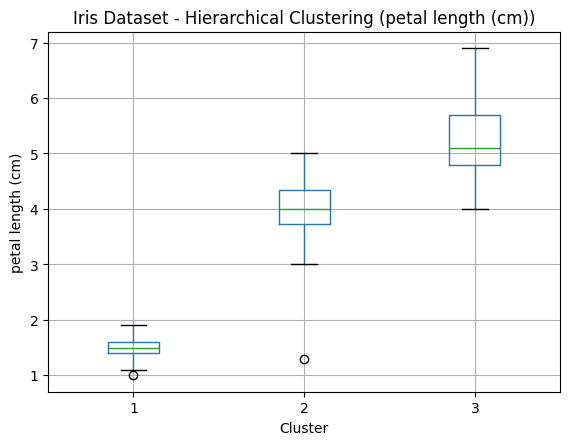

<Figure size 1000x700 with 0 Axes>

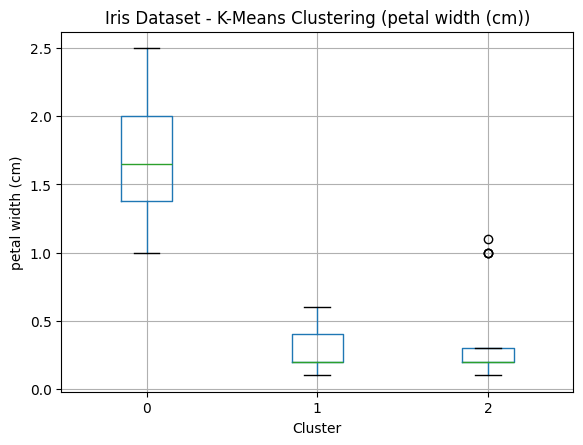

<Figure size 1000x700 with 0 Axes>

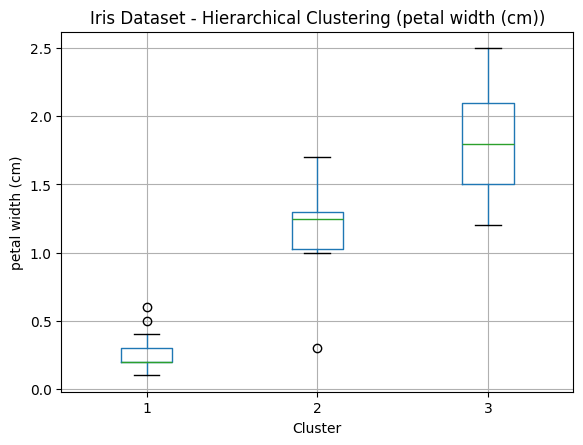

<Figure size 1200x600 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

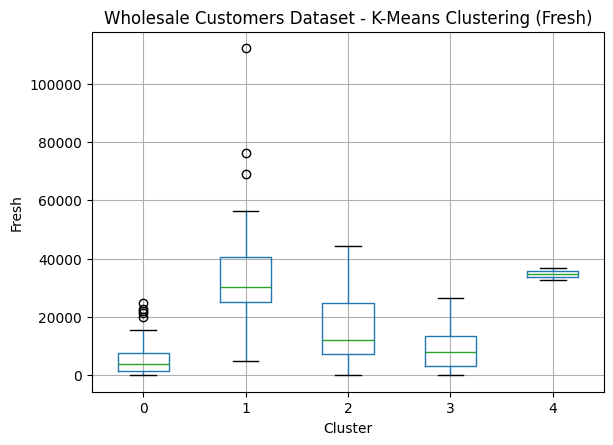

<Figure size 1000x700 with 0 Axes>

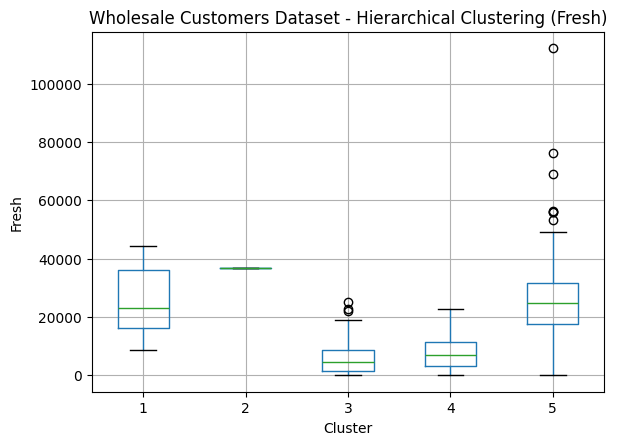

<Figure size 1000x700 with 0 Axes>

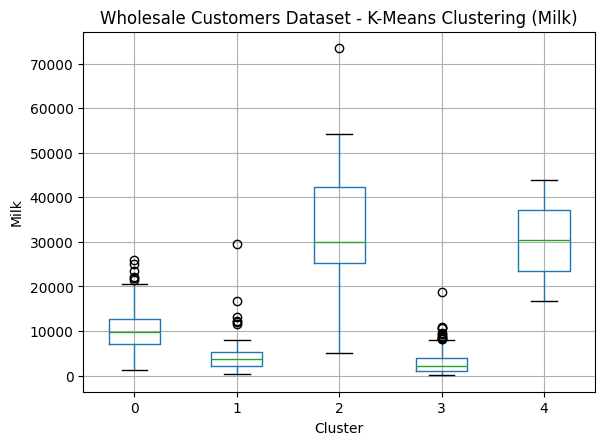

<Figure size 1000x700 with 0 Axes>

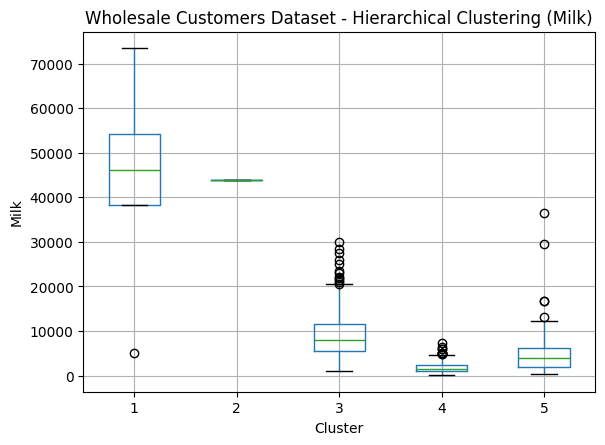

<Figure size 1000x700 with 0 Axes>

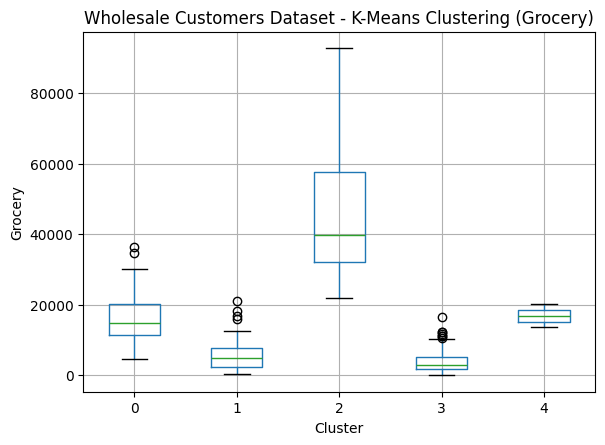

<Figure size 1000x700 with 0 Axes>

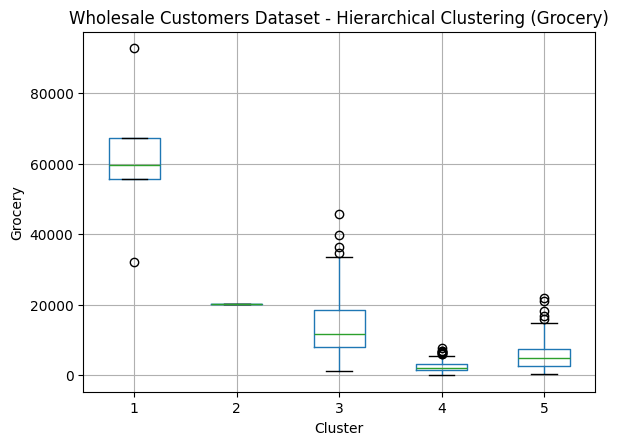

<Figure size 1000x700 with 0 Axes>

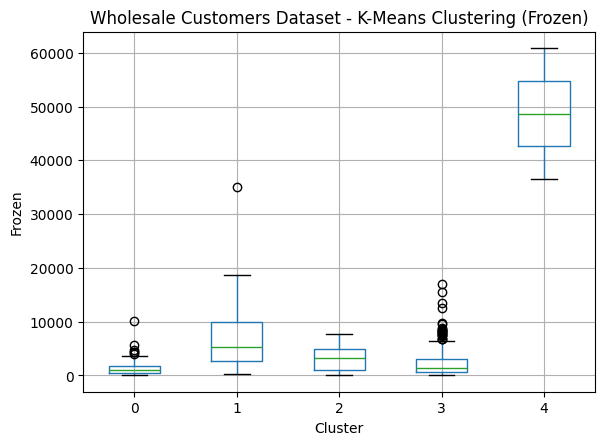

<Figure size 1000x700 with 0 Axes>

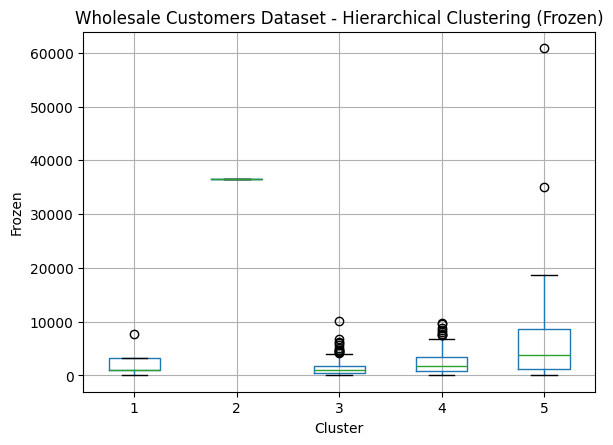

<Figure size 1000x700 with 0 Axes>

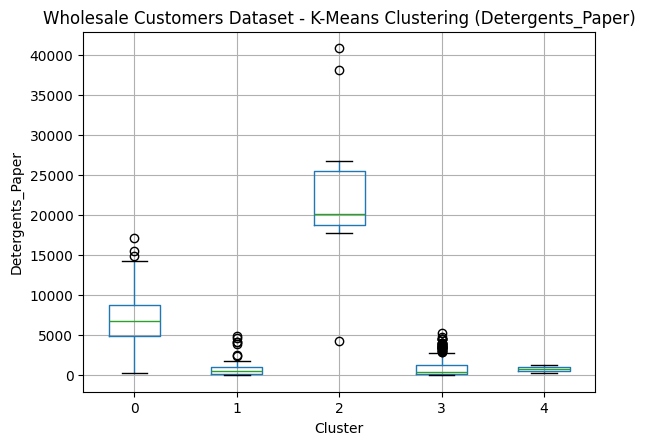

<Figure size 1000x700 with 0 Axes>

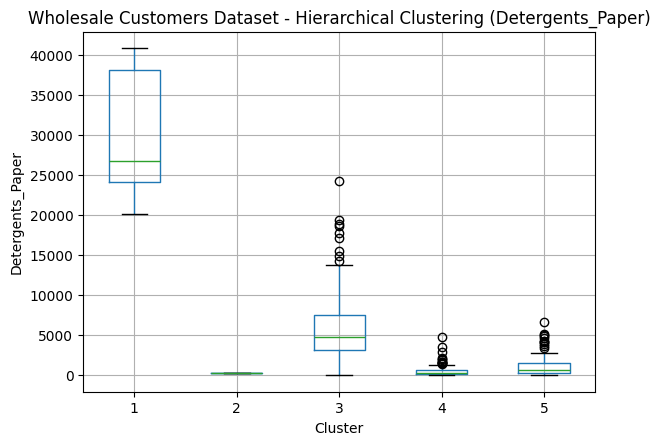

<Figure size 1000x700 with 0 Axes>

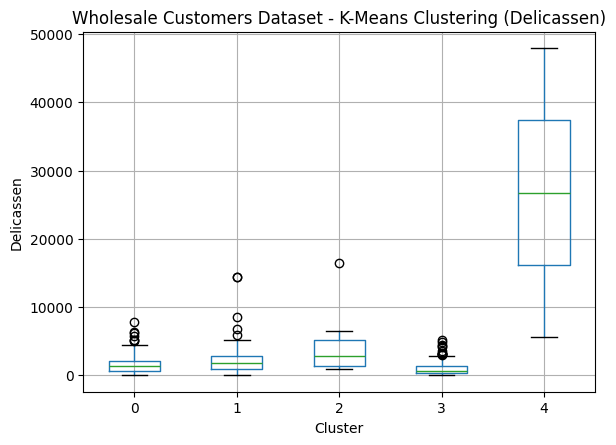

<Figure size 1000x700 with 0 Axes>

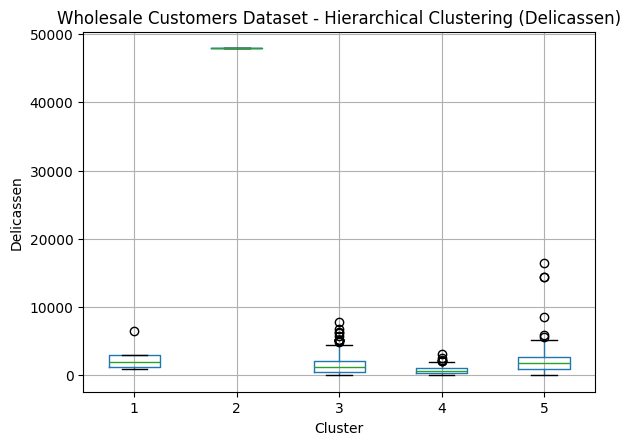

K-Means Silhouette Score for Iris Dataset with 2 clusters: 0.5817500491982808
K-Means Silhouette Score for Wholesale Dataset with 2 clusters: 0.3998278091730005
K-Means Silhouette Score for Iris Dataset with 3 clusters: 0.4798814508199817
K-Means Silhouette Score for Wholesale Dataset with 3 clusters: 0.4582633767207058
K-Means Silhouette Score for Iris Dataset with 4 clusters: 0.3850454053045392
K-Means Silhouette Score for Wholesale Dataset with 4 clusters: 0.34939129340421093
K-Means Silhouette Score for Iris Dataset with 5 clusters: 0.34503345350274617
K-Means Silhouette Score for Wholesale Dataset with 5 clusters: 0.36890127429678043
Hierarchical Clustering Silhouette Score for Iris Dataset with linkage 'single': 0.504645610832545
Hierarchical Clustering Silhouette Score for Wholesale Dataset with linkage 'single': 0.7345379499658352
Hierarchical Clustering Silhouette Score for Iris Dataset with linkage 'complete': 0.44961848359884726
Hierarchical Clustering Silhouette Score for W

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load and preprocess datasets
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['Cluster_KMeans'] = kmeans_clustering(iris_scaled, 3)
iris_data['Cluster_Hierarchical'] = hierarchical_clustering(iris_scaled, 3)

wholesale_data = pd.read_csv('Whole_sale_customers_data.csv')
wholesale_data = wholesale_data.drop(columns=['Channel', 'Region'])  # Drop non-numeric columns
wholesale_data = wholesale_data.fillna(0)  # Handle missing values
wholesale_data['Cluster_KMeans'] = kmeans_clustering(wholesale_scaled, 5)
wholesale_data['Cluster_Hierarchical'] = hierarchical_clustering(wholesale_scaled, 5)

# Summary statistics for Iris dataset
print("Iris Dataset - K-Means Clustering Summary:")
print(iris_data.groupby('Cluster_KMeans').mean())

print("\nIris Dataset - Hierarchical Clustering Summary:")
print(iris_data.groupby('Cluster_Hierarchical').mean())

# Summary statistics for Wholesale dataset
print("\nWholesale Customers Dataset - K-Means Clustering Summary:")
print(wholesale_data.groupby('Cluster_KMeans').mean())

print("\nWholesale Customers Dataset - Hierarchical Clustering Summary:")
print(wholesale_data.groupby('Cluster_Hierarchical').mean())

# Visualization of clusters for Iris dataset
plt.figure(figsize=(12, 6))
for feature in iris.feature_names:
    plt.figure(figsize=(10, 7))
    iris_data.boxplot(column=feature, by='Cluster_KMeans')
    plt.title(f'Iris Dataset - K-Means Clustering ({feature})')
    plt.suptitle('')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

    plt.figure(figsize=(10, 7))
    iris_data.boxplot(column=feature, by='Cluster_Hierarchical')
    plt.title(f'Iris Dataset - Hierarchical Clustering ({feature})')
    plt.suptitle('')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

# Visualization of clusters for Wholesale dataset
plt.figure(figsize=(12, 6))
for feature in wholesale_data.columns[:-2]:  # Exclude cluster labels
    plt.figure(figsize=(10, 7))
    wholesale_data.boxplot(column=feature, by='Cluster_KMeans')
    plt.title(f'Wholesale Customers Dataset - K-Means Clustering ({feature})')
    plt.suptitle('')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

    plt.figure(figsize=(10, 7))
    wholesale_data.boxplot(column=feature, by='Cluster_Hierarchical')
    plt.title(f'Wholesale Customers Dataset - Hierarchical Clustering ({feature})')
    plt.suptitle('')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

# Varying the number of clusters for K-Means and observing impact
for k in [2, 3, 4, 5]:
    kmeans_labels_iris = kmeans_clustering(iris_scaled, k)
    silhouette_avg = silhouette_score(iris_scaled, kmeans_labels_iris)
    print(f"K-Means Silhouette Score for Iris Dataset with {k} clusters: {silhouette_avg}")

    kmeans_labels_wholesale = kmeans_clustering(wholesale_scaled, k)
    silhouette_avg = silhouette_score(wholesale_scaled, kmeans_labels_wholesale)
    print(f"K-Means Silhouette Score for Wholesale Dataset with {k} clusters: {silhouette_avg}")

# Varying linkage criteria for Hierarchical Clustering
for method in ['single', 'complete', 'average']:
    linked_iris = linkage(iris_scaled, method=method)
    hierarchical_labels_iris = fcluster(linked_iris, 3, criterion='maxclust')
    silhouette_avg = silhouette_score(iris_scaled, hierarchical_labels_iris)
    print(f"Hierarchical Clustering Silhouette Score for Iris Dataset with linkage '{method}': {silhouette_avg}")

    linked_wholesale = linkage(wholesale_scaled, method=method)
    hierarchical_labels_wholesale = fcluster(linked_wholesale, 5, criterion='maxclust')
    silhouette_avg = silhouette_score(wholesale_scaled, hierarchical_labels_wholesale)
    print(f"Hierarchical Clustering Silhouette Score for Wholesale Dataset with linkage '{method}': {silhouette_avg}")


### 5. Comparison and Reporting:
## Step 9: 
#### Compare the effectiveness of K-Means and Hierarchical Clustering across the two datasets. Discuss which algorithm performed better for each dataset and why, considering factors such as data distribution and feature space.

## Step 10: 
#### Prepare a comprehensive Article summarizing the findings, including visualizations, cluster interpretations, and a comparative analysis of the clustering techniques used. 


Iris Dataset - K-Means Silhouette Score: 0.4798814508199817
Iris Dataset - Hierarchical Silhouette Score: 0.4466890410285909
Iris Dataset - K-Means Davies-Bouldin Score: 0.7893630242997912
Iris Dataset - Hierarchical Davies-Bouldin Score: 0.8034665302876755

Wholesale Dataset - K-Means Silhouette Score: 0.36890127429678043
Wholesale Dataset - Hierarchical Silhouette Score: 0.23988371669170097
Wholesale Dataset - K-Means Davies-Bouldin Score: 1.0293788434486797
Wholesale Dataset - Hierarchical Davies-Bouldin Score: 0.9727210249077043


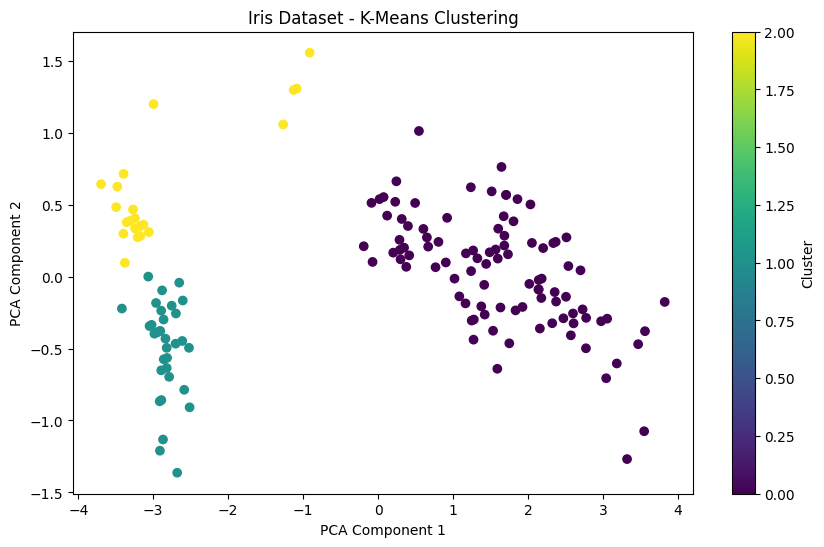

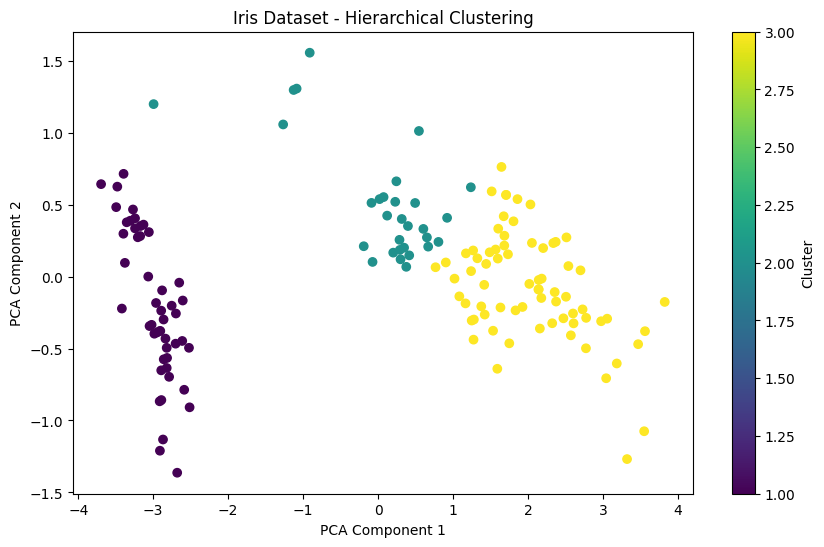

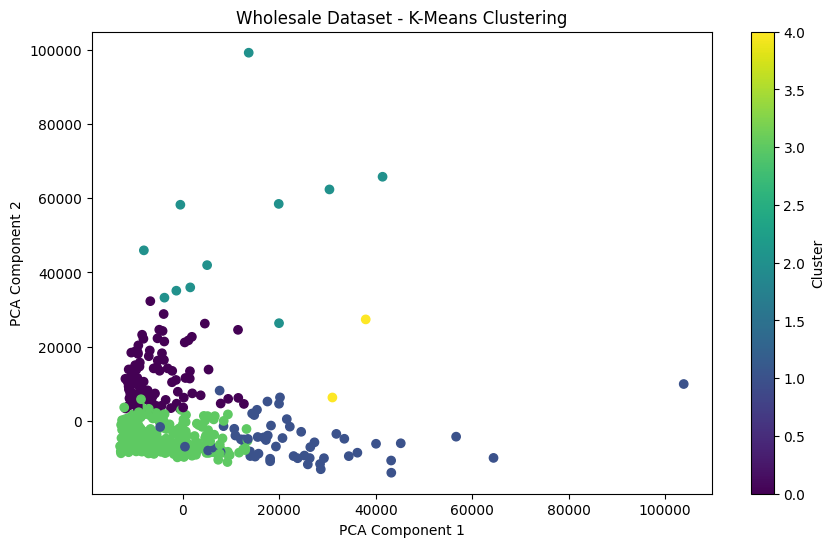

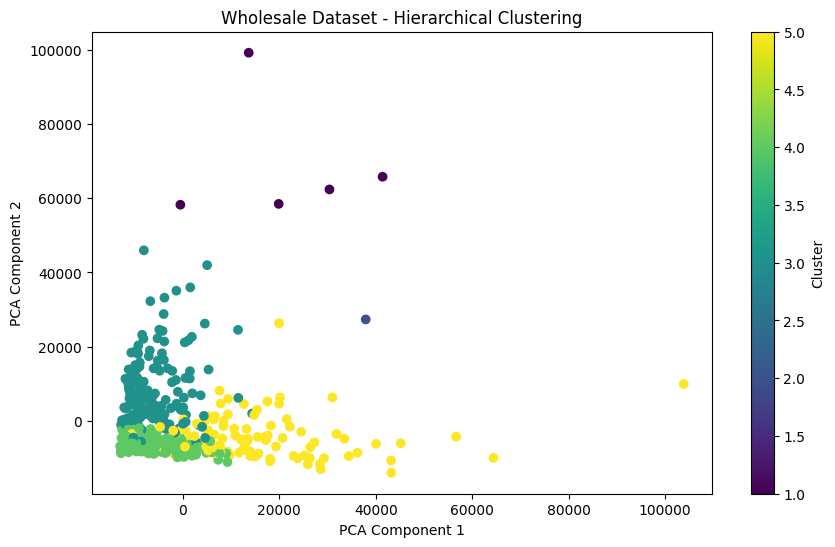

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Function to apply K-Means clustering
def kmeans_clustering(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    return labels

# Function to apply Hierarchical clustering
def hierarchical_clustering(X, n_clusters, method='ward'):
    linked = linkage(X, method=method)
    labels = fcluster(linked, n_clusters, criterion='maxclust')
    return labels

# Load and preprocess Iris dataset
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_scaled = StandardScaler().fit_transform(iris_data)

# Load and preprocess Wholesale Customers dataset
wholesale_data = pd.read_csv('Whole_sale_customers_data.csv')
wholesale_data = wholesale_data.drop(columns=['Channel', 'Region'])  # Drop non-numeric columns
wholesale_data = wholesale_data.fillna(0)  # Handle missing values
wholesale_scaled = StandardScaler().fit_transform(wholesale_data)

# Apply K-Means and Hierarchical Clustering to Iris dataset
iris_data['Cluster_KMeans'] = kmeans_clustering(iris_scaled, 3)
iris_data['Cluster_Hierarchical'] = hierarchical_clustering(iris_scaled, 3)

# Apply K-Means and Hierarchical Clustering to Wholesale Customers dataset
wholesale_data['Cluster_KMeans'] = kmeans_clustering(wholesale_scaled, 5)
wholesale_data['Cluster_Hierarchical'] = hierarchical_clustering(wholesale_scaled, 5)

# Metrics for Iris dataset
kmeans_silhouette_iris = silhouette_score(iris_scaled, iris_data['Cluster_KMeans'])
hierarchical_silhouette_iris = silhouette_score(iris_scaled, iris_data['Cluster_Hierarchical'])
kmeans_db_iris = davies_bouldin_score(iris_scaled, iris_data['Cluster_KMeans'])
hierarchical_db_iris = davies_bouldin_score(iris_scaled, iris_data['Cluster_Hierarchical'])

print(f"Iris Dataset - K-Means Silhouette Score: {kmeans_silhouette_iris}")
print(f"Iris Dataset - Hierarchical Silhouette Score: {hierarchical_silhouette_iris}")
print(f"Iris Dataset - K-Means Davies-Bouldin Score: {kmeans_db_iris}")
print(f"Iris Dataset - Hierarchical Davies-Bouldin Score: {hierarchical_db_iris}")

# Metrics for Wholesale Customers dataset
kmeans_silhouette_wholesale = silhouette_score(wholesale_scaled, wholesale_data['Cluster_KMeans'])
hierarchical_silhouette_wholesale = silhouette_score(wholesale_scaled, wholesale_data['Cluster_Hierarchical'])
kmeans_db_wholesale = davies_bouldin_score(wholesale_scaled, wholesale_data['Cluster_KMeans'])
hierarchical_db_wholesale = davies_bouldin_score(wholesale_scaled, wholesale_data['Cluster_Hierarchical'])

print(f"\nWholesale Dataset - K-Means Silhouette Score: {kmeans_silhouette_wholesale}")
print(f"Wholesale Dataset - Hierarchical Silhouette Score: {hierarchical_silhouette_wholesale}")
print(f"Wholesale Dataset - K-Means Davies-Bouldin Score: {kmeans_db_wholesale}")
print(f"Wholesale Dataset - Hierarchical Davies-Bouldin Score: {hierarchical_db_wholesale}")

# Create comparison plots
def plot_comparison(data, cluster_col, title):
    plt.figure(figsize=(10, 6))
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(data)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data[cluster_col], cmap='viridis')
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

plot_comparison(iris_data, 'Cluster_KMeans', 'Iris Dataset - K-Means Clustering')
plot_comparison(iris_data, 'Cluster_Hierarchical', 'Iris Dataset - Hierarchical Clustering')
plot_comparison(wholesale_data, 'Cluster_KMeans', 'Wholesale Dataset - K-Means Clustering')
plot_comparison(wholesale_data, 'Cluster_Hierarchical', 'Wholesale Dataset - Hierarchical Clustering')
